### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable in the stroop experiment is the condition of the task, being the fact whether or not it is a congruent word condition.

The dependent variable is the time it takes to name the ink color. We expect this to depend on the independent variabel.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The most logical null hypothesis here would be that there is no difference between recorded times for both word conditions.

The most logical alternative hypothesis would be that there is a difference between the recorded times for both conditions.

In mathematical expressions this would look like:

$$H_0: u_c = u_i$$
$$H_a: u_c \neq u_i$$
with: 
* $H_O$ = null hypothesis
* $H_a$ = Alternative hypothesis
* $u_c$ = Population mean for the congruent word condition
* $U_i$ = Population mean for the incongruent word condition
    

The most approrpriate statistical test for this hypothesis is a two-tailed dependent t-test.

I'd opt for a two tailed t-test since we currently have no indication yet on the direction of the effect.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [7]:
import pandas as pd

data = pd.read_csv('stroopdata.csv')

print(data.head())
stats = data.describe()
print(stats)
print(stats.loc['75%'] - stats.loc['25%'])


   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803
       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
Congruent      4.30550
Incongruent    5.33475
dtype: float64


The table below summarizes some descriptive statitstics of the dataset.

Parameter | Congruent word condition [s]| Incongruent word condition [s]
:--- | :---: | :---:
Mean | 14.1 | 22.0 
Std. dev | 3.6 | 4.8
IQR | 4.3 | 5.3


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

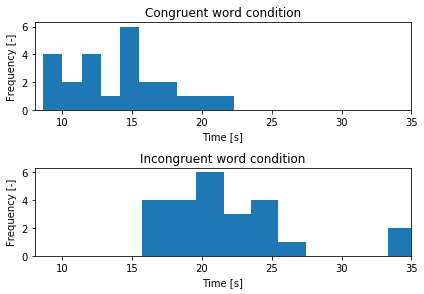

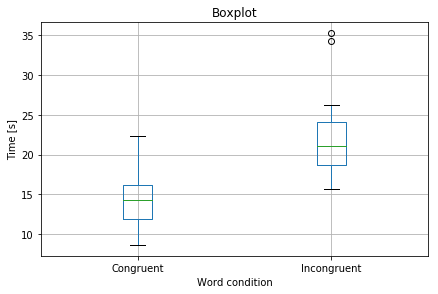

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(211)
plt.hist(data['Congruent'], bins=10)
plt.xlim(8, 35)
plt.title('Congruent word condition')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [-]')
plt.subplot(212)
plt.hist(data['Incongruent'], bins=10)
plt.xlim(8, 35)
plt.title('Incongruent word condition')
plt.tight_layout()
plt.xlabel('Time [s]')
plt.ylabel('Frequency [-]')
plt.show()

plt.figure()
data.boxplot(['Congruent', 'Incongruent'])
plt.title('Boxplot')
plt.tight_layout()
plt.ylabel('Time [s]')
plt.xlabel('Word condition')
plt.show()

The plots above show that both the average as well as the variability of the incongruent words dataset is higher compared to the congruent dataset. There are two measurements which show a large deviation from the average. 

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [13]:
# Perform the statistical test here
import scipy.stats

test = scipy.stats.ttest_rel(data[['Congruent']], data[['Incongruent']])
print('Test statistic: %s ' % round(test.statistic[0], 2))
print('p-value: %s' % test.pvalue[0])


Test statistic: -8.02 
p-value: 4.10300058571e-08


The small p-value and the large absolute value of t-statistic indicate very clearly that we can reject the null hypothesis thus accept the alternative hypothesis that the measured times for the congruent word condition are signicantly different than those for the incongruent word condition. The negative sign of the test statistic here gives a clear indication on the direction of the effect. Based on this we can also conclude that the time needed for the incongruent word condtion is signicant higher than for the congruent word condition.

This is according the the expectations and the observations made in the descriptive analysis above.
